In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
files.upload()  # Choose kaggle.json from your local system


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jyotimathpal","key":"689e83873030fd7a83bc914093d764a4"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d prepinstaprime/tomato-reviews


Dataset URL: https://www.kaggle.com/datasets/prepinstaprime/tomato-reviews
License(s): CC0-1.0
 74% 66.0M/89.0M [00:00<00:00, 116MB/s]
100% 89.0M/89.0M [00:00<00:00, 128MB/s]


In [ ]:
!unzip tomato-reviews.zip


Archive:  tomato-reviews.zip
  inflating: zomato.csv              


In [ ]:
!ls


'kaggle (1).json'   kaggle.json   sample_data   tomato-reviews.zip   zomato.csv


In [ ]:
df = pd.read_csv("zomato.csv")
print(df.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

In [ ]:
# Get basic info about the data
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Display a summary of the dataset
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
# Dropping unnecessary columns
df = df.drop(['url', 'address', 'phone', 'menu_item', 'listed_in(type)', 'listed_in(city)'], axis=1)

# Displaying the cleaned data
print(df.head())


                    name online_order book_table   rate  votes      location  \
0                  Jalsa          Yes        Yes  4.1/5    775  Banashankari   
1         Spice Elephant          Yes         No  4.1/5    787  Banashankari   
2        San Churro Cafe          Yes         No  3.8/5    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88  Banashankari   
4          Grand Village           No         No  3.8/5    166  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two pe

In [ ]:
# Cleaning the rate column
df['rate'] = df['rate'].astype(str).apply(lambda x: x.split('/')[0])  # Keep the rating part only
df['rate'].replace('NEW', np.nan, inplace=True)  # Replace 'NEW' with NaN
df['rate'].replace('-', np.nan, inplace=True)  # Replace '-' with NaN
df['rate'] = df['rate'].astype(float)  # Convert to float for analysis

# Filling missing rates with the median rate
df['rate'].fillna(df['rate'].median(), inplace=True)

print(df['rate'].head())


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64


<ipython-input-11-66e4095e47e3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].replace('NEW', np.nan, inplace=True)  # Replace 'NEW' with NaN
<ipython-input-11-66e4095e47e3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [ ]:
# Dropping rows with missing values in selected columns
df.dropna(subset=['location', 'rest_type', 'cuisines', 'approx_cost(for two people)'], inplace=True)

# Verifying that no missing values remain in these columns
print(df.isnull().sum())


name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                          0
dish_liked                     27713
cuisines                           0
approx_cost(for two people)        0
reviews_list                       0
dtype: int64


In [ ]:
print(df.columns.tolist())


['name', 'online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list']


In [ ]:
# Dropping unnecessary columns
df = df.drop(['location', 'rest_type', 'dish_liked', 'approx_cost(for two people)'], axis=1)

# Displaying the remaining columns
print(df.columns)


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'cuisines',
       'reviews_list'],
      dtype='object')


In [ ]:
# Encoding categorical columns
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

# Displaying the first few rows to verify encoding
print(df.head())


                    name  online_order  book_table  rate  votes  \
0                  Jalsa             1           1   4.1    775   
1         Spice Elephant             1           0   4.1    787   
2        San Churro Cafe             1           0   3.8    918   
3  Addhuri Udupi Bhojana             0           0   3.7     88   
4          Grand Village             0           0   3.8    166   

                         cuisines  \
0  North Indian, Mughlai, Chinese   
1     Chinese, North Indian, Thai   
2          Cafe, Mexican, Italian   
3      South Indian, North Indian   
4        North Indian, Rajasthani   

                                        reviews_list  
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...  
1  [('Rated 4.0', 'RATED\n  Had been here for din...  
2  [('Rated 3.0', "RATED\n  Ambience is not that ...  
3  [('Rated 4.0', "RATED\n  Great food and proper...  
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...  


In [ ]:
# Removing extra spaces from cuisine names
df['cuisines'] = df['cuisines'].str.replace(', ', ',')

# Displaying unique cuisine combinations to check the formatting
print(df['cuisines'].unique()[:10])  # Displaying the first 10 unique cuisine combinations


['North Indian,Mughlai,Chinese' 'Chinese,North Indian,Thai'
 'Cafe,Mexican,Italian' 'South Indian,North Indian'
 'North Indian,Rajasthani' 'North Indian'
 'North Indian,South Indian,Andhra,Chinese' 'Pizza,Cafe,Italian'
 'Cafe,Italian,Continental' 'Cafe,Mexican,Italian,Momos,Beverages']


In [ ]:
import re

# Cleaning the reviews_list column
df['reviews_list'] = df['reviews_list'].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", str(x)))

# Displaying a few cleaned reviews to check
print(df['reviews_list'].head(5))


0    Rated  RATEDn  A beautiful place to dine inThe...
1    Rated  RATEDn  Had been here for dinner with f...
2    Rated  RATEDn  Ambience is not that good enoug...
3    Rated  RATEDn  Great food and proper Karnataka...
4    Rated  RATEDn  Very good restaurant in neighbo...
Name: reviews_list, dtype: object


In [ ]:
# Removing repetitive "Rated RATEDn" text from reviews
df['reviews_list'] = df['reviews_list'].apply(lambda x: re.sub(r"Rated RATEDn\s*", "", str(x)))

# Displaying the cleaned reviews
print(df['reviews_list'].head(5))


0    Rated  RATEDn  A beautiful place to dine inThe...
1    Rated  RATEDn  Had been here for dinner with f...
2    Rated  RATEDn  Ambience is not that good enoug...
3    Rated  RATEDn  Great food and proper Karnataka...
4    Rated  RATEDn  Very good restaurant in neighbo...
Name: reviews_list, dtype: object


In [ ]:
# One-Hot Encoding for cuisines
cuisines_dummies = df['cuisines'].str.get_dummies(',')

# Concatenating the encoded cuisines with the original dataframe
df = pd.concat([df, cuisines_dummies], axis=1)

# Dropping the original 'cuisines' column since it is now encoded
df = df.drop('cuisines', axis=1)

# Displaying the updated dataframe
print(df.head())


                    name  online_order  book_table  rate  votes  \
0                  Jalsa             1           1   4.1    775   
1         Spice Elephant             1           0   4.1    787   
2        San Churro Cafe             1           0   3.8    918   
3  Addhuri Udupi Bhojana             0           0   3.7     88   
4          Grand Village             0           0   3.8    166   

                                        reviews_list  Afghan  Afghani  \
0  Rated  RATEDn  A beautiful place to dine inThe...       0        0   
1  Rated  RATEDn  Had been here for dinner with f...       0        0   
2  Rated  RATEDn  Ambience is not that good enoug...       0        0   
3  Rated  RATEDn  Great food and proper Karnataka...       0        0   
4  Rated  RATEDn  Very good restaurant in neighbo...       0        0   

   African  American  ...  Sushi  Tamil  Tea  Tex-Mex  Thai  Tibetan  Turkish  \
0        0         0  ...      0      0    0        0     0        0        0

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

# Applying the function to calculate polarity for each review
df['sentiment'] = df['reviews_list'].apply(get_sentiment)

# Displaying the updated DataFrame with sentiment scores
print(df[['name', 'reviews_list', 'sentiment']].head())


                    name                                       reviews_list  \
0                  Jalsa  Rated  RATEDn  A beautiful place to dine inThe...   
1         Spice Elephant  Rated  RATEDn  Had been here for dinner with f...   
2        San Churro Cafe  Rated  RATEDn  Ambience is not that good enoug...   
3  Addhuri Udupi Bhojana  Rated  RATEDn  Great food and proper Karnataka...   
4          Grand Village  Rated  RATEDn  Very good restaurant in neighbo...   

   sentiment  
0   0.322417  
1   0.183661  
2   0.138162  
3   0.253288  
4   0.405097  


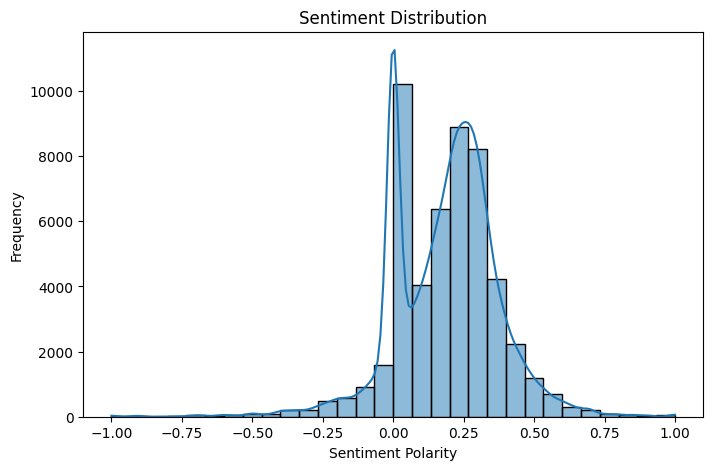

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [24]:
print("Top 5 Positive Reviews:")
print(df[['name', 'reviews_list', 'sentiment']].sort_values(by='sentiment', ascending=False).head(5))

print("\nTop 5 Negative Reviews:")
print(df[['name', 'reviews_list', 'sentiment']].sort_values(by='sentiment').head(5))


Top 5 Positive Reviews:
                        name  \
41741  Aashirvaad Restaurant   
28837            Kerala Mess   
9623       Coal Grill & Cafe   
10142            Kerala Mess   
42931               La Mirch   

                                            reviews_list  sentiment  
41741  Rated  RATEDn  Just now I order from this plac...        1.0  
28837  Rated  RATEDn  Awesome biriyani and gulab jamu...        1.0  
9623                 Rated  RATEDn  Awesome Arabian food        1.0  
10142  Rated  RATEDn  Awesome biriyani and gulab jamu...        1.0  
42931  Rated  RATEDn  Didnt have the option for a  so...        1.0  

Top 5 Negative Reviews:
                  name                                       reviews_list  \
35895    Ghar Ki Rasoi  Rated  RATEDn  Please dont order paneer roll f...   
20573    Ghar Ki Rasoi  Rated  RATEDn  Please dont order paneer roll f...   
9883     Ghar Ki Rasoi  Rated  RATEDn  Please dont order paneer roll f...   
49869  Mont Blanc Cafe  Rated 

In [25]:
avg_sentiment = df.groupby('name')['sentiment'].mean().sort_values(ascending=False)
print("Average Sentiment of Restaurants:")
print(avg_sentiment.head(10))


Average Sentiment of Restaurants:
name
Aashirvaad Restaurant    1.000
TGS Retails              1.000
Guntur Royal Dine        1.000
Fresh Code               1.000
Bread & Better           1.000
Coal Grill & Cafe        1.000
Cake Ghar                0.910
Seven Star               0.900
Vijayalaxmi Veg          0.896
S.K Green Gardens        0.880
Name: sentiment, dtype: float64


In [27]:
print(df.columns)


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'reviews_list',
       'Afghan', 'Afghani', 'African', 'American',
       ...
       'Tamil', 'Tea', 'Tex-Mex', 'Thai', 'Tibetan', 'Turkish', 'Vegan',
       'Vietnamese', 'Wraps', 'sentiment'],
      dtype='object', length=114)


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizing the cleaned reviews using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust the number of features
X = tfidf.fit_transform(df['reviews_list']).toarray()
y = np.where(df['sentiment'] > 0, 1, 0)  # Convert sentiment to binary (1 for positive, 0 for negative)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (51148, 5000)
Shape of y: (51148,)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 40918
Testing set size: 10230


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initializing the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 97.13%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2417
           1       0.97      0.99      0.98      7813

    accuracy                           0.97     10230
   macro avg       0.97      0.95      0.96     10230
weighted avg       0.97      0.97      0.97     10230


Confusion Matrix:
[[2216  201]
 [  93 7720]]
